In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("d:\gli\dse\data\car-mpg.csv")  

In [8]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [9]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


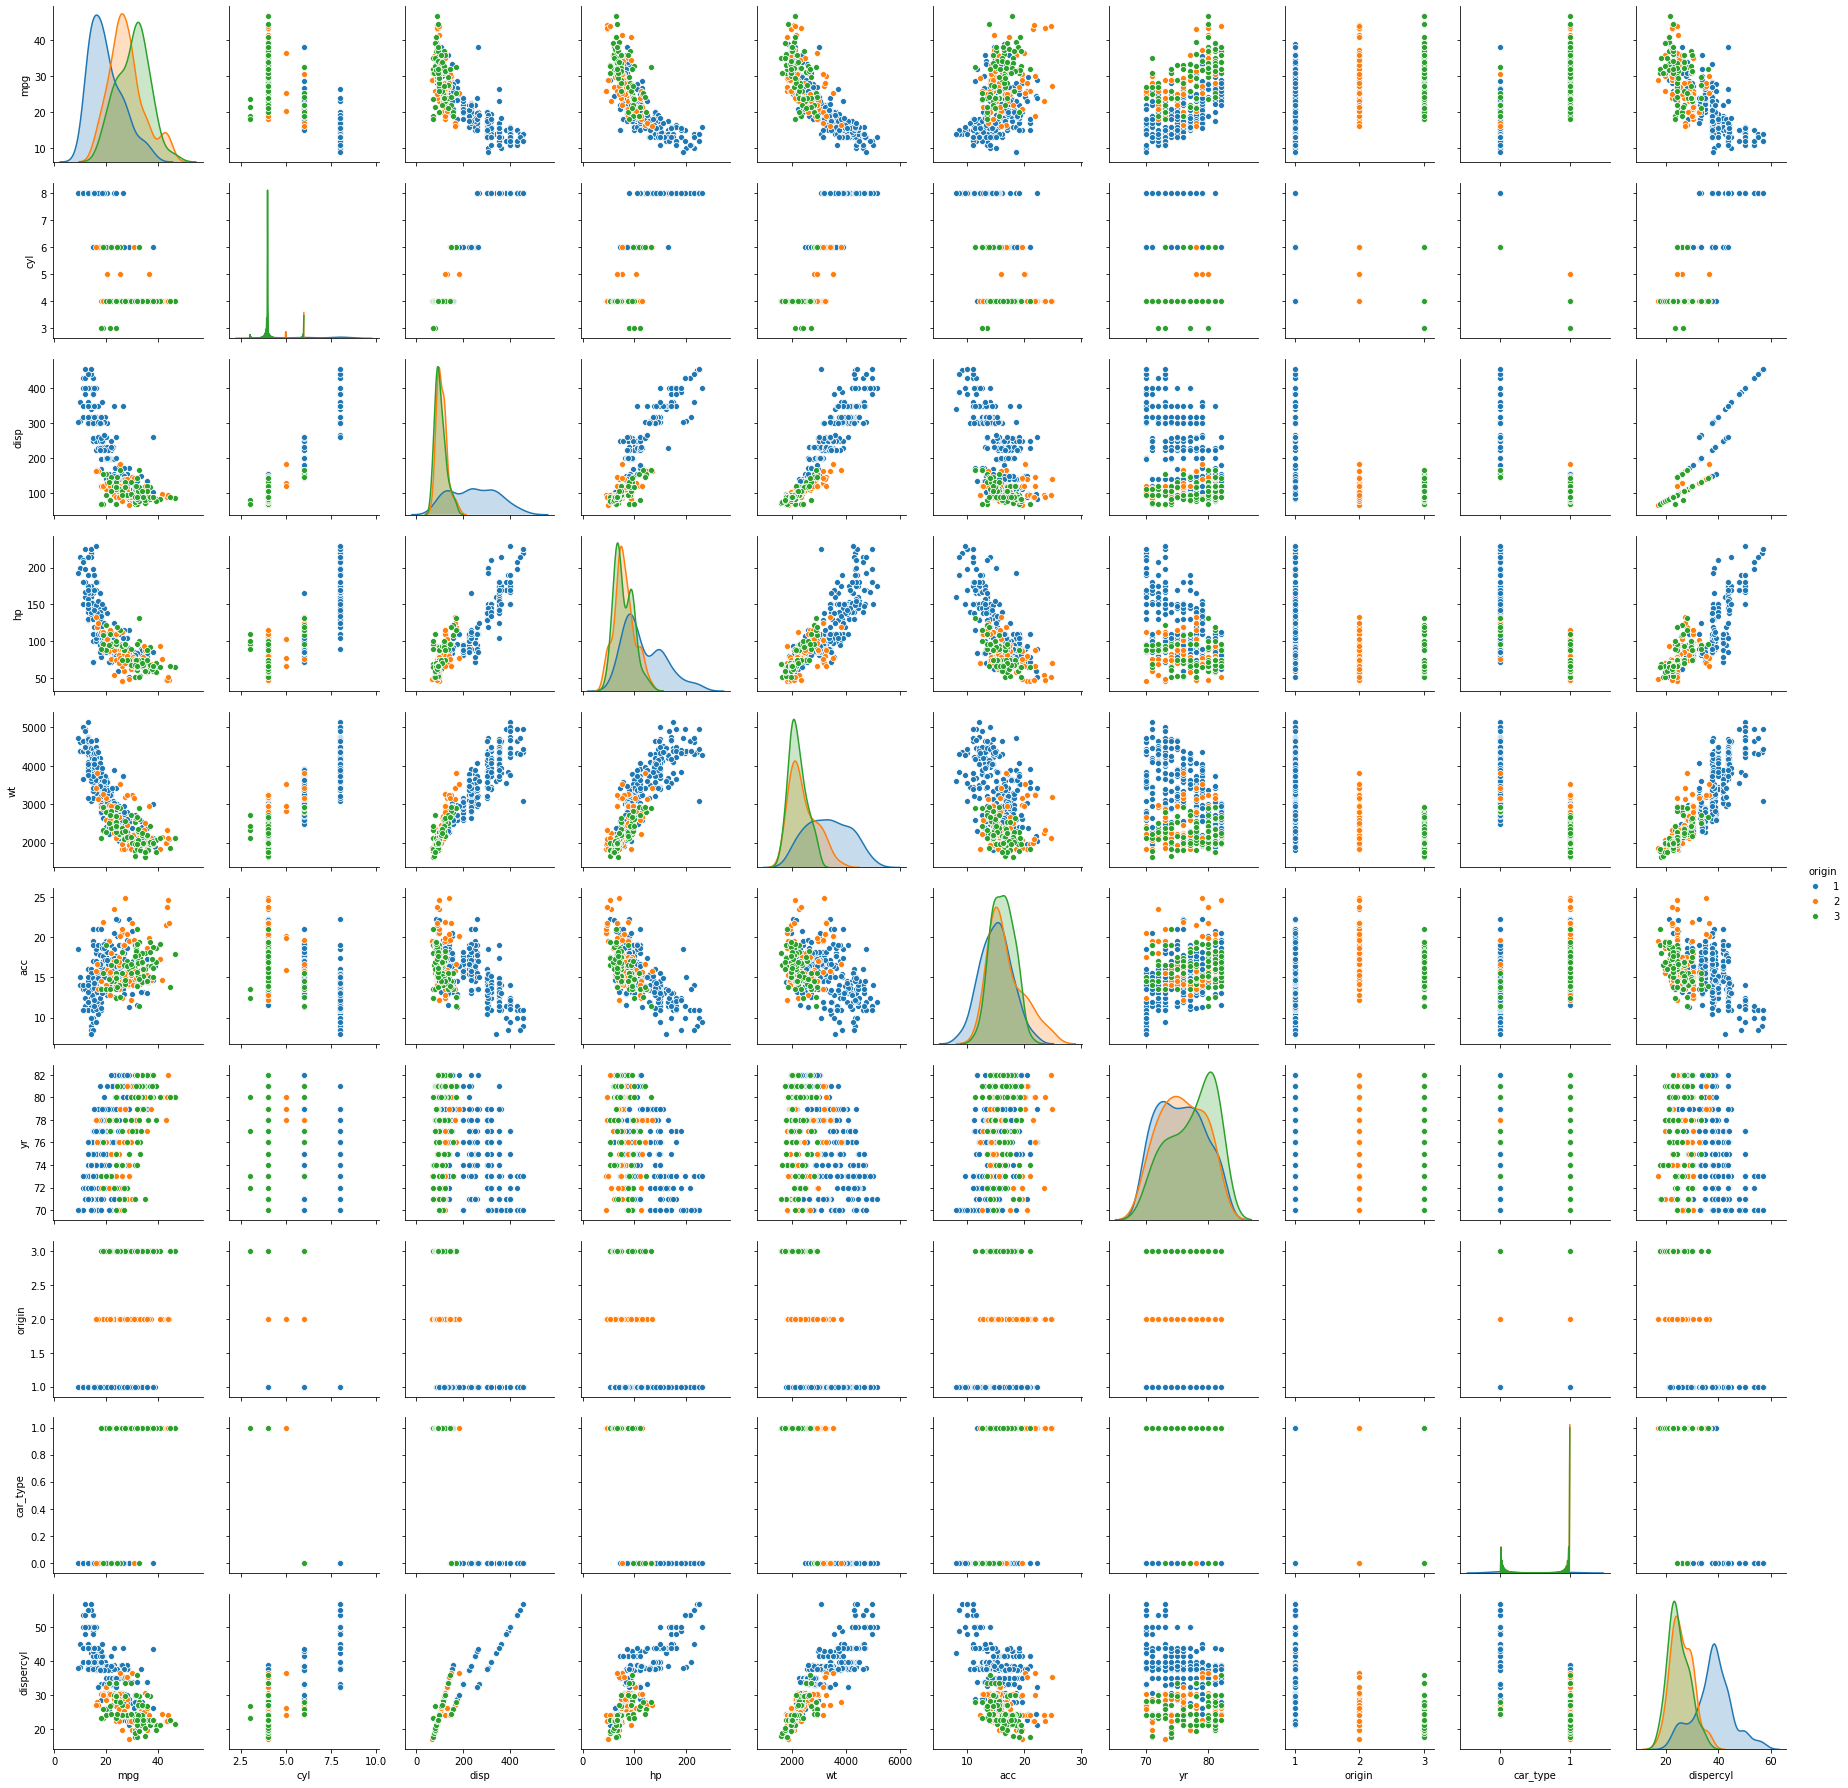

In [10]:

mpg_df_attr = mpg_df.iloc[:, 0:9]
mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin')   # to plot density curve instead of histogram


In [11]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)


mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values
#X = array[:,1:5] # select all rows and first 7 columns which are the attributes
#y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)



## Hierarchical clustering starts here

In [12]:
from sklearn.cluster import AgglomerativeClustering 

In [13]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [14]:
model.fit(array)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [15]:
mpg_df_attr['labels'] = model.labels_

mpg_df_attr.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,298,298,298,298,298,298,298,298
1,96,96,96,96,96,96,96,96
2,4,4,4,4,4,4,4,4


In [16]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [17]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [18]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

pdistance = pdist(mpg_df_attr_z)

Z = linkage(mpg_df_attr_z, 'average')
c, coph_dists = cophenet(Z , pdistance)

c

0.8187325626877269

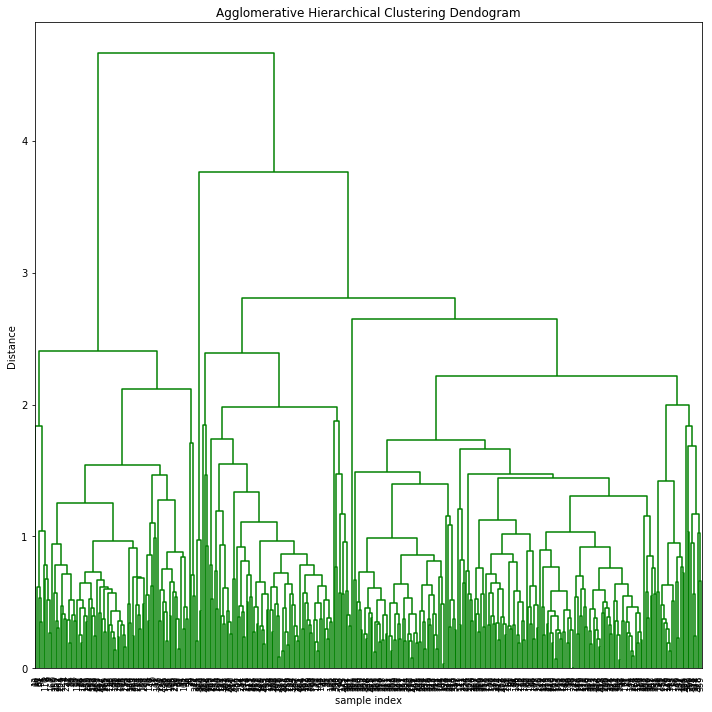

In [19]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 800, leaf_font_size=8. )
plt.tight_layout()

In [20]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mpg_df_attr_z, 'complete' )
c, coph_dists = cophenet(Z , pdist(mpg_df_attr_z))

c

0.7905745269780852

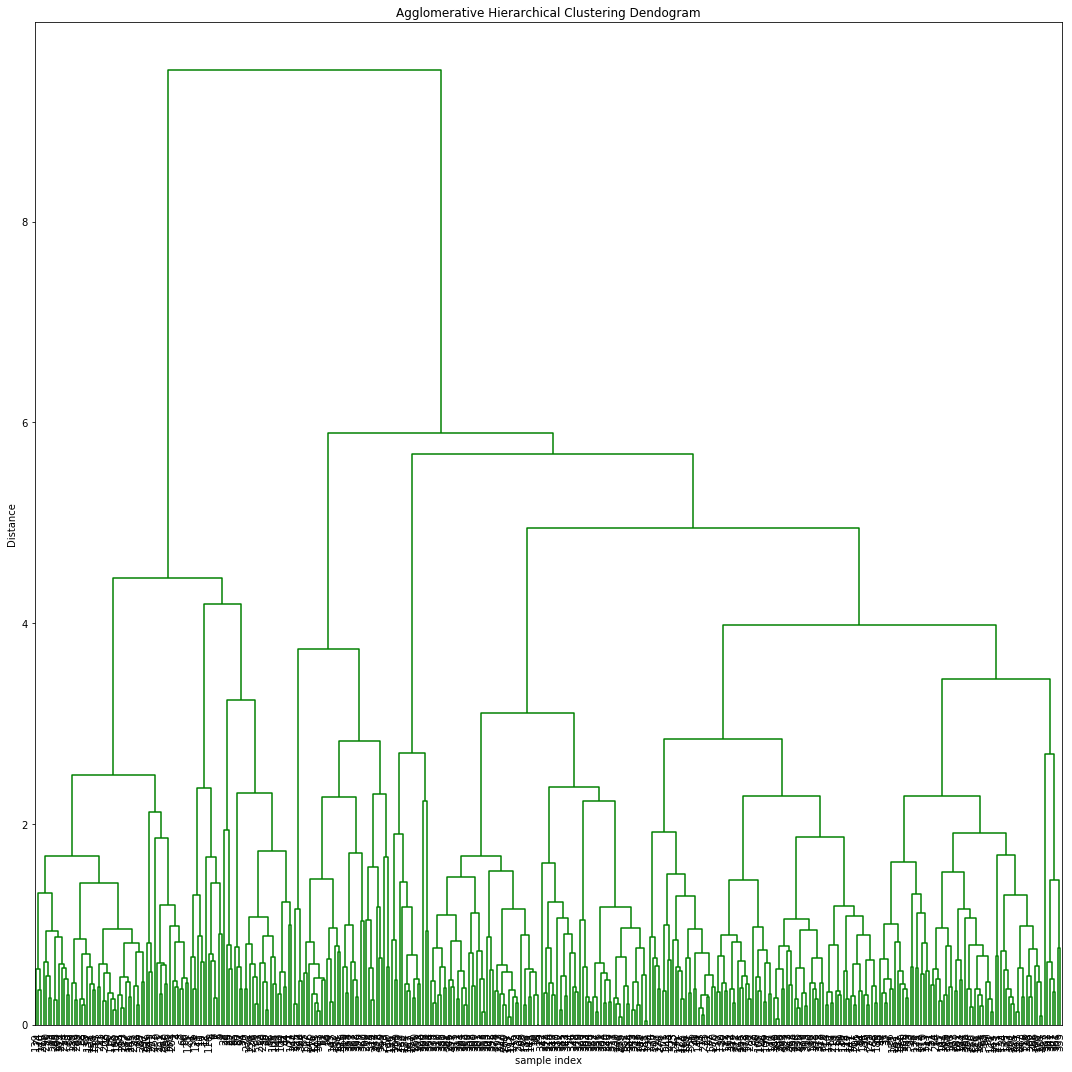

In [21]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=2000,  leaf_font_size=10. )
plt.tight_layout()

In [22]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mpg_df_attr_z, 'ward')
c, coph_dists = cophenet(Z , pdist(mpg_df_attr_z))

c

0.7977729618300813

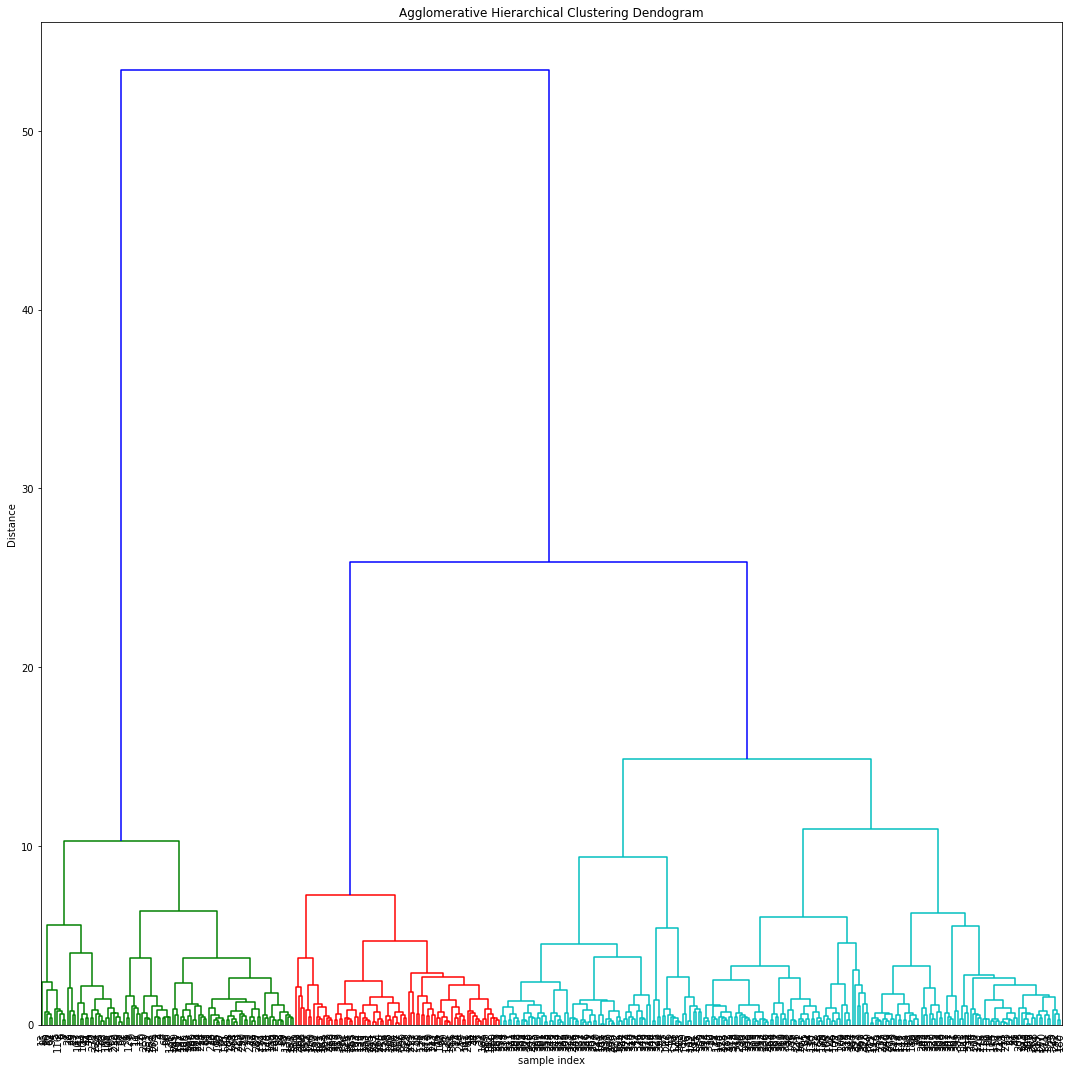

In [23]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=25,  leaf_font_size=10. )
plt.tight_layout()

In [24]:
model = AgglomerativeClustering(n_clusters=3,  linkage='single')

In [25]:
model.fit(array)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

In [26]:

Z = linkage(mpg_df_attr_z, 'single')
c, coph_dists = cophenet(Z , pdist(mpg_df_attr_z))

c

0.7806725864577639

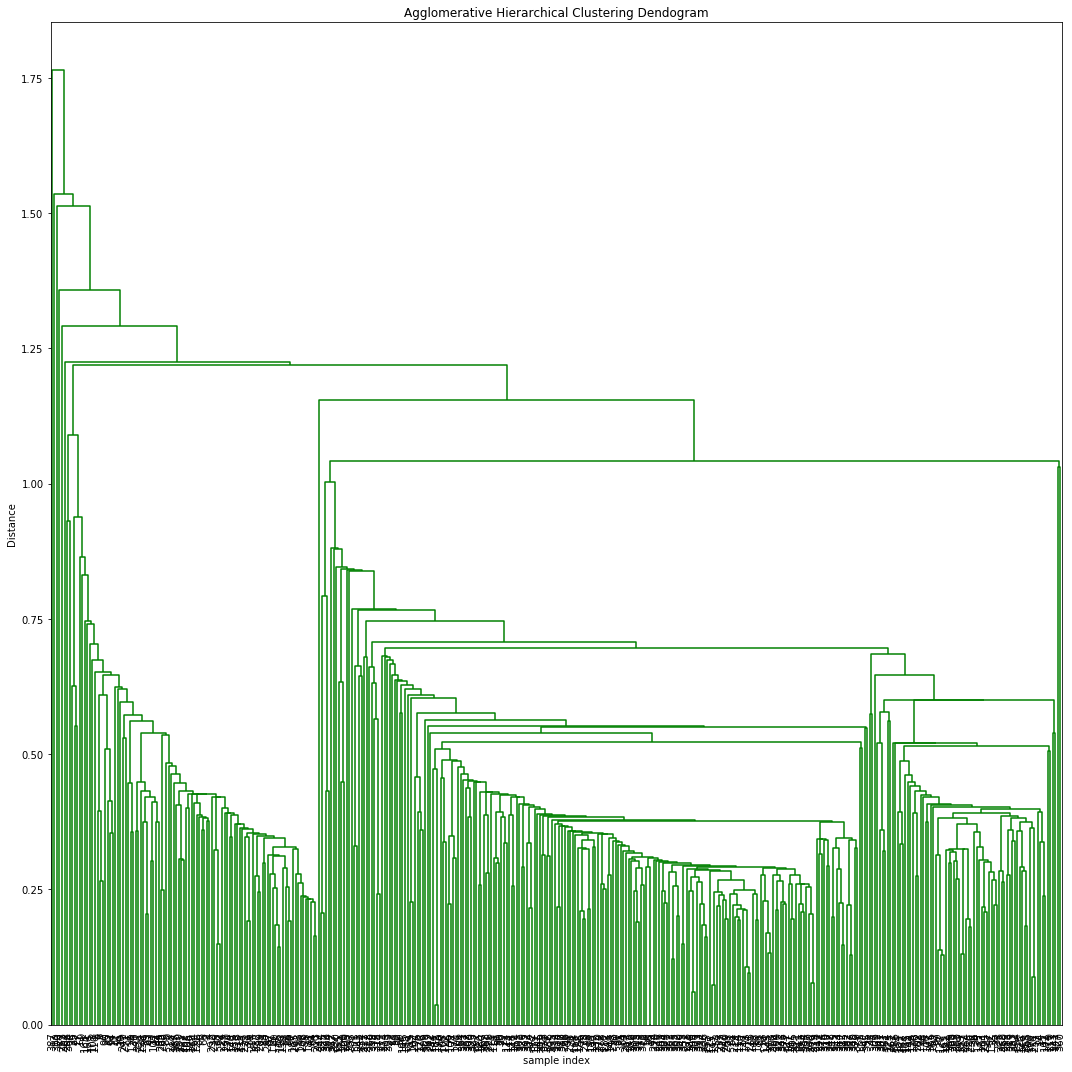

In [27]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=25,  leaf_font_size=10. )
plt.tight_layout()

In [28]:
mpg_df_attr['labels'] = model.labels_

mpg_df_attr.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,396,396,396,396,396,396,396,396
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
